<a href="https://colab.research.google.com/github/svperbeast/ai_lab/blob/main/adaptive_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Adaboost

#### (1) Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

#### (2) Load dataset for implementation
###### - load PimaIndianDiabetes dataset and split

In [2]:
PimaIndiansDiabetes = pd.read_csv("/content/PimaIndiansDiabetes.csv")

PimaIndiansDiabetes_X = PimaIndiansDiabetes.drop(columns=['diabetes'])
PimaIndiansDiabetes_Y = PimaIndiansDiabetes['diabetes']

n_train = 400

dia_train_X, dia_test_X, dia_train_Y, dia_test_Y = train_test_split(PimaIndiansDiabetes_X, PimaIndiansDiabetes_Y, train_size=n_train)

#### (3) Examples before initial settings

In [ ]:
wgt = np.repeat(1/400, 400)

dia_rp = DecisionTreeClassifier(max_depth=30, min_samples_split=20)
dia_rp.fit(dia_train_X, dia_train_Y, sample_weight=wgt)

ci = dia_rp.predict(dia_train_X)

x = confusion_matrix(dia_train_Y, ci)
print("confusion matrix = \n", x)

x_bst = 1-np.diag(x).sum()/np.sum(x)
print("bst = ", 1-np.diag(x).sum()/np.sum(x))

confusion matrix = 
 [[239  22]
 [ 35 104]]
bst =  0.14249999999999996


#### (4) Learning Adaboost

In [ ]:
cit = np.array([])
ait = np.array([])
x_bst = np.array([])

iter = 20

for i in range(0,iter):
    dia_rp = DecisionTreeClassifier(max_depth=30, min_samples_split=20)
    dia_rp.fit(dia_train_X, dia_train_Y, sample_weight=wgt)

    ci = dia_rp.predict(dia_train_X)
    cit = np.append(cit, ci).reshape(i+1,-1)

    x = confusion_matrix(dia_train_Y, ci)
    x_bst = np.append(x_bst, 1-np.diag(x).sum()/np.sum(x))

    ai = 0.5 * np.log(wgt[ci == dia_train_Y].sum()/wgt[ci != dia_train_Y].sum())
    ait = np.append(ait, ai)

    zt = np.sum(wgt * np.exp(-ai * np.sign(1*np.array(ci == dia_train_Y)-0.5)))
    wgt = wgt * np.exp(-ai * np.sign(1*np.array(ci == dia_train_Y)-0.5)) / zt

    print("iteration ", i+1, " : ", x_bst[i], " ", ai)

iteration  1  :  0.14249999999999996   0.8973395896656948
iteration  2  :  0.2025   0.9711745706029457
iteration  3  :  0.15749999999999997   1.083906054468901
iteration  4  :  0.15249999999999997   1.0941496185872037
iteration  5  :  0.1975   1.176294551961644
iteration  6  :  0.20999999999999996   1.1081186631991746
iteration  7  :  0.21250000000000002   1.1266423554939862
iteration  8  :  0.22999999999999998   1.0700533967796155
iteration  9  :  0.21999999999999997   1.1342093451344526
iteration  10  :  0.21999999999999997   1.2475630451550535
iteration  11  :  0.1925   1.1922556359479841
iteration  12  :  0.21750000000000003   0.9539374811962537
iteration  13  :  0.22250000000000003   1.3352113239901455
iteration  14  :  0.25249999999999995   1.2662373080601508
iteration  15  :  0.2025   1.1853225191917767
iteration  16  :  0.2025   1.2391847159873228
iteration  17  :  0.245   1.2431321662519241
iteration  18  :  0.23250000000000004   1.1428837750616394
iteration  19  :  0.22499999

#### (5) Prediction of Adaboost

In [ ]:
cit = np.sign(1*(cit == 'pos')-0.5)

In [ ]:
pred = np.array([])
for i in range(0,iter):
    x = 0
    for j in range(0,i+1):
        x = x + ait[j]*cit[j,:]
    # print(x)
    pred = np.append(pred, x)

pred = np.sign(pred.reshape(iter,-1))

print(pred)

y_bst = np.array([])
dia_train_Y_tmp = np.sign(1*(dia_train_Y=='pos')-0.5)
for i in range(0,iter):
    x = confusion_matrix(dia_train_Y_tmp, pred[i,:])
    print(1-np.diag(x).sum()/np.sum(x))
    y_bst = np.append(y_bst, 1-np.diag(x).sum()/np.sum(x))


[[ 1. -1. -1. ... -1.  1. -1.]
 [-1. -1. -1. ...  1.  1. -1.]
 [ 1. -1. -1. ...  1.  1. -1.]
 ...
 [ 1. -1. -1. ...  1.  1. -1.]
 [ 1. -1. -1. ...  1.  1. -1.]
 [ 1. -1. -1. ...  1.  1. -1.]]
0.14249999999999996
0.2025
0.03249999999999997
0.040000000000000036
0.0
0.0050000000000000044
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


### (6) Plotting

##### - Error from each boosting iterations

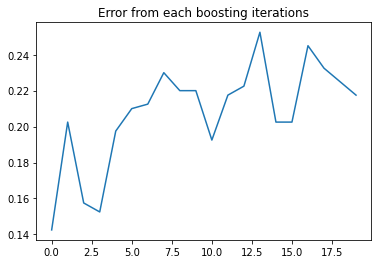

In [ ]:
plt.plot(range(0,iter), x_bst)
plt.title('Error from each boosting iterations')
plt.show()

##### - Error arising from averaging predictions

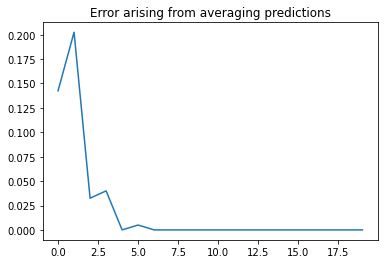

In [ ]:
plt.plot(range(0,iter), y_bst)
plt.title("Error arising from averaging predictions")
plt.show()

### (7) Using sklearn.ensemble package

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

phishing = pd.read_csv(filepath_or_buffer= glob_dir+"/phishing.csv")

phishing_X = phishing.drop(columns=['Y'])
phishing_Y = phishing['Y']

train_X, test_X, train_Y, test_Y = train_test_split(phishing_X, phishing_Y, train_size=0.7)

adaboost = AdaBoostClassifier(n_estimators=50)
adaboost.fit(train_X, train_Y)

pred_tr = adaboost.predict(train_X)
x_tr = confusion_matrix(train_Y, pred_tr)
print("confusion matrix for train set = \n",x_tr)
print("Acc = ", np.diag(x_tr).sum()/np.sum(x_tr))

pred_ts = adaboost.predict(test_X)
x_ts = confusion_matrix(test_Y, pred_ts)
print("confusion matrix for test set = \n",x_ts)
print("Acc = ", np.diag(x_ts).sum()/np.sum(x_ts))

confusion matrix for train set = 
 [[471  29]
 [ 54 392]]
Acc =  0.912262156448203
confusion matrix for test set = 
 [[186  16]
 [ 29 175]]
Acc =  0.8891625615763546


In [ ]:
import os

os.system('jupyter nbconvert --to html jp1.ipynb')